In [1]:
import numpy as np
import pandas as pd
import os
import sys

embeddings = {} #embedding dictionary # rows = node_index # columns = vector

with open(os.path.join(sys.path[0], "karate.embeddings"), "r") as f:
    f.readline()# header
    first_vec = f.readline().split()
    first_vec = [float(i) for i in first_vec]
        
    embeddings[first_vec[0]] = first_vec[1:] 

    column_cnt = len(first_vec) - 1 # size of vector dimension
    
    while True:
        line = f.readline()
        if not line: break
        splitted_line = line.split()
        
        splitted_line = [float(i) for i in splitted_line]
            
        embeddings[splitted_line[0]] = splitted_line[1:]
        
print(embeddings)

{1.0: [0.19195914, 0.21458042, 0.057641227, -0.060369853, 0.06541689, -0.010113899, 0.019643987, 0.17500718, -0.12418597, 0.1050059, 0.041938666, -0.29485497, 0.29084206, -0.09729856, 0.14435808, 0.37355697, -0.010492725, 0.10074602, 0.29931384, 0.09875278, -0.056580264, 0.029252166, 0.0075498465, -0.08568755, -0.07989237, 0.026610618, -0.082200475, 0.13155356, 0.45890638, 0.15506725, -0.3080234, 0.2016767, -0.08961422, -0.04631209, -0.23056543, 0.004146878, 0.0148640415, 0.1157392, -0.27687672, 0.088399, 0.102625534, 0.18940836, -0.121093936, 0.016137518, 0.084691964, 0.072259046, -0.0394968, -0.2523765, 0.12026536, -0.15896429, -0.01457725, 0.29193756, 0.11747691, -0.10464002, 0.25313732, 0.0072244694, -0.17424554, 0.1596798, -0.0691162, -0.17180322, 0.11328282, 0.1701824, -0.102205455, -0.13039061], 34.0: [0.17561722, -0.22574009, 0.02213348, -0.12745899, 0.04350735, -0.006252759, 0.06335305, 0.21491736, -0.3942095, 0.5647455, -0.058722045, -0.27297932, -0.08488565, 0.133344, 0.1937

In [2]:
missing=[0]*column_cnt

def node_vector(key):
    try:
        return(embeddings[key])
    except:
        return(missing)

In [3]:
vertices_index = list(embeddings.keys()) #order of vertices

In [4]:
df = pd.DataFrame(columns = range(0,column_cnt))

for i in range(1,len(vertices_index)+1):
    df.loc[i] = embeddings[float(i)]
    
print(df)



          0         1         2         3         4         5         6   \
1   0.191959  0.214580  0.057641 -0.060370  0.065417 -0.010114  0.019644   
2   0.129390  0.055187 -0.064965 -0.089499  0.235749  0.142032  0.033013   
3   0.148422 -0.080995 -0.032279 -0.102579  0.183122  0.083858  0.031646   
4   0.134772  0.049100 -0.069127 -0.087243  0.260446  0.135499  0.013942   
5   0.281014  0.447151  0.162458 -0.108272 -0.081433 -0.056126 -0.009178   
6   0.290055  0.526006  0.215345 -0.088446 -0.147302 -0.110150 -0.000228   
7   0.309565  0.466490  0.245719 -0.107197 -0.187575 -0.144537  0.001989   
8   0.159157  0.010849 -0.080137 -0.092868  0.228698  0.132482  0.013384   
9   0.166906 -0.100238  0.036060 -0.113407  0.035488 -0.004658  0.056681   
10  0.142827 -0.184534 -0.034539 -0.103798  0.156590  0.063865  0.048390   
11  0.295702  0.462008  0.157934 -0.121353 -0.129880 -0.035550 -0.009039   
12  0.209416  0.230285  0.043281 -0.067464  0.090680  0.034531 -0.004680   
13  0.173323

In [5]:
#Implement PCA to reduce dimensionality of embeddings

#vector representation(embeddings) list
X = df.values.tolist()
#print(X)
#Computing correlation of matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

print(neww_X)

[[ 0.69284257+0.j -0.23879865+0.j]
 [ 0.53805939+0.j  0.38554409+0.j]
 [ 0.05875892+0.j  0.29633763+0.j]
 [ 0.58907046+0.j  0.43826645+0.j]
 [ 1.11711687+0.j -0.83080505+0.j]
 [ 1.20440722+0.j -1.07466843+0.j]
 [ 0.90292609+0.j -1.19928257+0.j]
 [ 0.46963124+0.j  0.39764824+0.j]
 [-0.27004655+0.j -0.05290159+0.j]
 [-0.3249949 +0.j  0.29054023+0.j]
 [ 1.14098347+0.j -0.90726127+0.j]
 [ 0.76754387+0.j -0.18419923+0.j]
 [ 0.50691046+0.j  0.20741899+0.j]
 [ 0.29516783+0.j  0.08533286+0.j]
 [-0.661367  +0.j -0.23360382+0.j]
 [-0.87302478+0.j -0.09497623+0.j]
 [ 1.25009541+0.j -1.33135076+0.j]
 [ 0.65150724+0.j  0.01956721+0.j]
 [-0.67221411+0.j -0.09549341+0.j]
 [ 0.29109399+0.j  0.05606373+0.j]
 [-0.59603879+0.j -0.00867389+0.j]
 [ 0.58690246+0.j -0.00345547+0.j]
 [-0.71625765+0.j -0.09230372+0.j]
 [-0.94570204+0.j -0.27063859+0.j]
 [-0.89698269+0.j -0.61933572+0.j]
 [-1.03309325+0.j -0.63341752+0.j]
 [-0.76871373+0.j  0.04309664+0.j]
 [-0.60571483+0.j -0.30125463+0.j]
 [-0.32042009+0.j -0

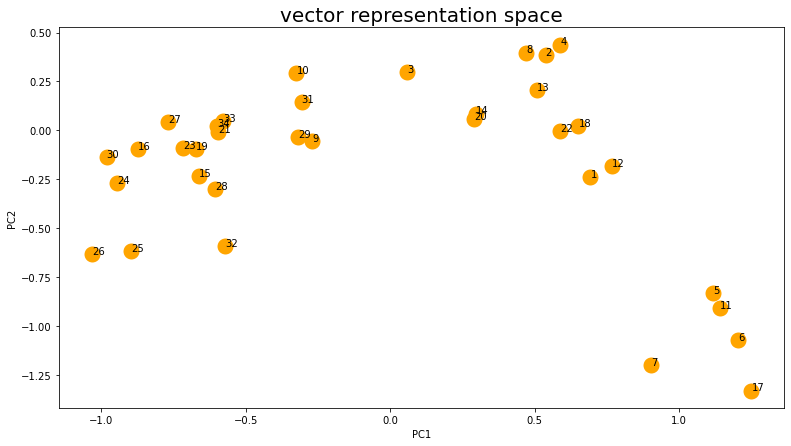

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='orange')
plt.xlabel("PC1",size=10)
plt.ylabel("PC2",size=10)
plt.title("vector representation space",size=20)

nodes= list(df.index)

for i, word in enumerate(nodes):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))